# Iris - Unsupervised Learning 

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READING THE DATASET
data = pd.read_csv('E:/TSF Projects & Gudelines/Iris.csv')

# DATA PREPROCESSING

In [3]:
#CHECKING THE HEAD OF DATA
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#CHECKING THE TAIL OF DATA
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#CHECKING NON-NULL VALUES AND DATATYPE 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see non null values for all the columns are same,so we can say there is no null values in the dataset.

In [6]:
#CHECKING NULL VALUES IN EACH COLUMN
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Removing id column.

data.drop(['Id'],axis = 1,inplace = True)

In [8]:
# Checking columns of dataset if ID column is removed or not

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Removing 'Iris-' from the Species column for each row.
Species = []
for type in data['Species']:
    type = type.split('-')[1]
    Species.append(type)

In [10]:
data['Species'] = Species

In [11]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EXPLORATORY DATA ANALYSIS

In [13]:
#CHECKING THE STATISTICAL DATA OF DATASET
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


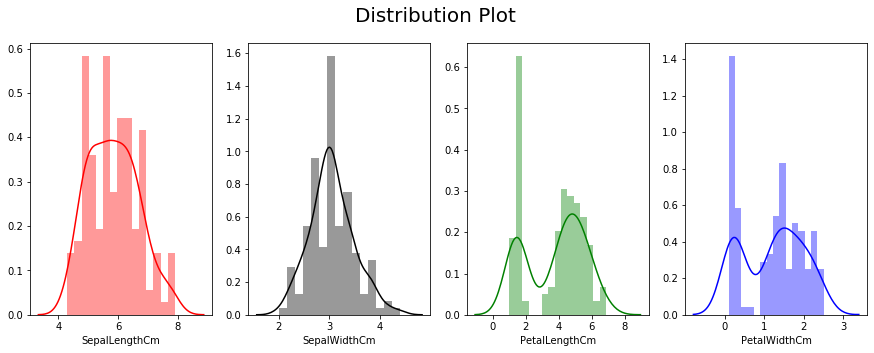

In [14]:
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,4,1)
sns.distplot(data['SepalLengthCm'],bins = 15,color = 'red')

plt.subplot(1,4,2)
sns.distplot(data['SepalWidthCm'],bins = 15,color = 'black')

plt.subplot(1,4,3)
sns.distplot(data['PetalLengthCm'],bins = 15,color = 'green')

plt.subplot(1,4,4)
sns.distplot(data['PetalWidthCm'],bins = 15,color = 'blue')

plt.suptitle('Distribution Plot', fontsize = 20)
plt.show()

# CLUSTERING

In [15]:
from sklearn.cluster import KMeans

In [16]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']


In [17]:
inertia = []
for i in range(1,21):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    

In [18]:
Frame = pd.DataFrame({'Cluster' : range(1,21),'inertia':inertia})

In [19]:
Frame = Frame.round(decimals = 2)

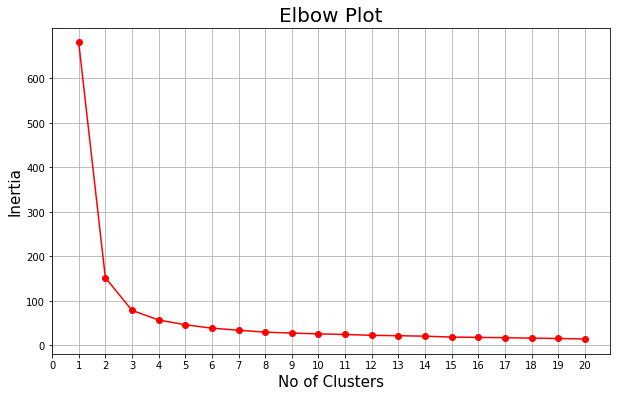

In [20]:
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.plot(Frame['Cluster'],Frame['inertia'],marker = 'o',color = 'red')
plt.xlabel('No of Clusters',fontsize = 15)
plt.ylabel('Inertia',fontsize = 15)
plt.yticks(ticks = np.arange(0,700,100))
plt.xticks(ticks = np.arange(0,21,1))
plt.title('Elbow Plot',fontsize = 20)
plt.show()

In [21]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']
kmeans = KMeans(n_clusters= 3)
km =kmeans.fit(X)

pred = km.predict(X)
frame = pd.DataFrame(X)
pred = km.predict(frame)

In [22]:
frame['Cluster'] = pred

In [23]:
frame[frame['Cluster']==0].mean()

SepalLengthCm    5.006
SepalWidthCm     3.418
PetalLengthCm    1.464
PetalWidthCm     0.244
Cluster          0.000
dtype: float64

In [24]:
frame[frame['Cluster']==1].mean()

SepalLengthCm    5.901613
SepalWidthCm     2.748387
PetalLengthCm    4.393548
PetalWidthCm     1.433871
Cluster          1.000000
dtype: float64

In [25]:
frame[frame['Cluster']==2].mean()

SepalLengthCm    6.850000
SepalWidthCm     3.073684
PetalLengthCm    5.742105
PetalWidthCm     2.071053
Cluster          2.000000
dtype: float64

## CHECKING MODEL THROUGH VISUALIZATION

In [26]:
from mpl_toolkits import mplot3d 

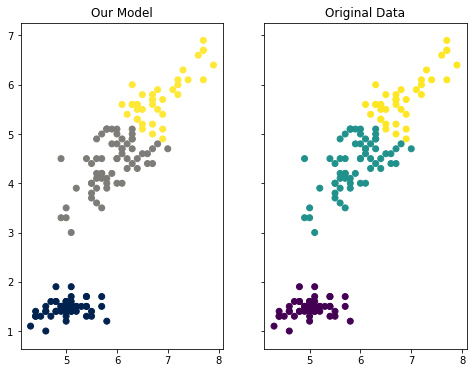

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8,6))

ax1.set_title('Our Model')

ax1.scatter(X['SepalLengthCm'],X['PetalLengthCm'],c=km.labels_,cmap = 'cividis')

ax2.set_title('Original Data')

ax2.scatter(X['SepalLengthCm'],X['PetalLengthCm'],c=frame['Cluster'],cmap = 'viridis')

plt.show()

Our Model has predicted perfectly for all the Clusters.

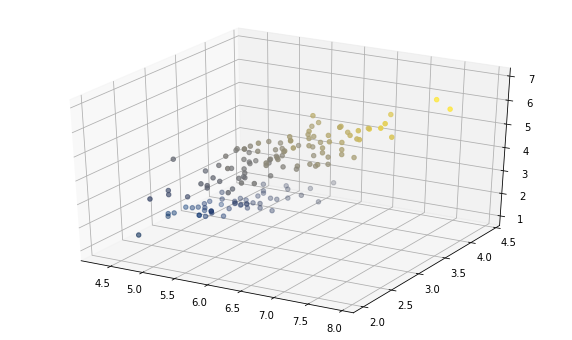

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = X['SepalLengthCm']
y = X['SepalWidthCm']
z = X['PetalLengthCm']

ax.scatter3D(x, y, z, c= x+y+z, cmap='cividis')
plt.show()

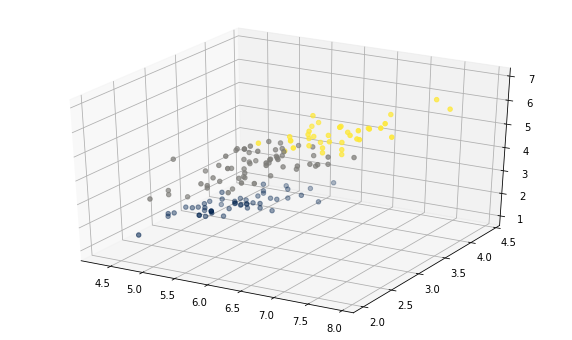

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = X['SepalLengthCm']
y = X['SepalWidthCm']
z = X['PetalLengthCm']

ax.scatter3D(x, y, z, c=frame['Cluster'], cmap='cividis')
plt.show()

### FINDINGS:

1) The best number of cluster for our dataset is 3.

2) Our Model has predicted clusters for all the datapoints correctly.